In [29]:
!pip install pandas

In [30]:
import pandas as pd
file_path='Combined_set_prescreened.csv';
total_info=pd.read_csv(file_path)
print(total_info)

                                               MOF  uptake_ads  uptake_des  \
0                                   XUKYEI_neutral    0.920997    0.668303   
1                           ja300034j_si_002_clean    0.433112    0.187346   
2                                   QIYDAF01_clean    0.827077    0.660425   
3                                     XAHPIH_clean    0.818678    0.634451   
4                                     VETMIS_clean    0.932519    0.746597   
...                                            ...         ...         ...   
7180                                  AQOTIK_clean    0.026746    0.110716   
7181  acs.inorgchem.6b00276_ic6b00276_si_006_clean    0.421515    0.395023   
7182  acs.inorgchem.6b01762_ic6b01762_si_002_clean    0.087637    0.074696   
7183  acs.inorgchem.6b02696_ic6b02696_si_002_clean    0.294982    0.280449   
7184              acscombsci.5b00188_5036495_clean    0.549701    0.613880   

      heat_ads  heat_des      LISD      LFSD     LISFS  Unit_ce

In [31]:
# Drop rows with any NaN values
total_info_cleaned = total_info.dropna()

total_info_cleaned

,MOF,uptake_ads,uptake_des,heat_ads,heat_des,LISD,LFSD,LISFS,Unit_cell_volume,Density,...,O,La,Cr,Ti,Ba,Rh,Ce,Cu,Al,Re
0,XUKYEI_neutral,0.920997,0.668303,-21.55231,-18.39099,13.18217,10.20370,13.18217,6140.000,0.287208,...,0,0,0,0,0,0,0,2,0,0
1,ja300034j_si_002_clean,0.433112,0.187346,-25.96441,-17.79542,17.49700,17.44104,17.49700,2800.680,0.713223,...,18,0,0,0,0,0,0,0,0,0
2,QIYDAF01_clean,0.827077,0.660425,-19.37443,-18.95302,22.00141,13.48659,22.00141,52812.600,0.303251,...,96,0,0,0,0,0,0,24,0,0
3,XAHPIH_clean,0.818678,0.634451,-21.96228,-19.54395,14.37026,13.22660,14.37026,12821.800,0.356183,...,40,0,0,0,0,0,0,8,0,0
4,VETMIS_clean,0.932519,0.746597,-22.10557,-19.92746,18.13430,11.96931,18.13430,33152.200,0.311959,...,48,0,0,0,0,0,0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,AQIXUU_clean,0.001177,0.062873,-25.56586,-49.26611,5.00071,3.78897,5.00071,787.077,2.316180,...,18,0,0,0,0,0,0,0,0,0
7177,AFOVOH_clean,0.165457,0.232918,-28.96937,-40.77527,8.74251,6.51591,8.19585,1598.690,1.048160,...,12,0,0,0,0,0,0,0,0,0
7178,ATIJUJ_manual,0.038061,0.186922,-10.98116,-19.63789,17.44029,16.95446,17.44029,3081.950,0.753394,...,18,0,0,0,0,0,0,0,0,0
7179,AFOVEX_clean,0.172913,0.244083,-29.31178,-38.54721,8.76979,6.57643,8.76042,1626.110,1.022060,...,12,0,0,0,0,0,2,0,0,0


In [32]:
uptake_ads = total_info_cleaned['uptake_ads']
uptake_des = total_info_cleaned['uptake_des']
heat_ads = total_info_cleaned['heat_ads']
heat_des = total_info_cleaned['heat_des']

In [33]:
# Given constants
delta_H_vap_Tev = 16.25          # Example value in kJ/mol
M_w = 0.044097                   # Molar mass in kg/mol
C_sorbent_p = 1                  # Specific heat capacity in kJ/(kg*K)
T_des = 358.15                   # Desorption temperature in Kelvin
T1 = 313.13                      # Initial temperature in Kelvin

# Calculate Δq
delta_q = uptake_ads - uptake_des

# Drop rows with negative Δq
filtered_indices = delta_q >= 0
total_info_cleaned = total_info_cleaned[filtered_indices].copy()
delta_q = delta_q[filtered_indices]  # Filter delta_q to match the filtered DataFrame

# Calculate <ΔH_ads>
avg_delta_H_ads = (heat_ads + heat_des) / 2
avg_delta_H_ads = avg_delta_H_ads[filtered_indices]  # Match indices with filtered DataFrame

# Calculate COP_R for each row
total_info_cleaned.loc[:, 'COP_R'] = (delta_H_vap_Tev * delta_q) / ((M_w * C_sorbent_p * (T_des - T1)) - (delta_q * avg_delta_H_ads))

# Print the results
print(total_info_cleaned[['MOF', 'COP_R']])


                         MOF     COP_R
0             XUKYEI_neutral  0.583945
1     ja300034j_si_002_clean  0.542431
2             QIYDAF01_clean  0.522907
3               XAHPIH_clean  0.515395
4               VETMIS_clean  0.512710
...                      ...       ...
6912            SANHUN_clean  0.000327
6913            PEKVUY_clean  0.000246
6914            HEXNII_clean  0.000137
6915            IBIYUO_clean  0.000066
6916            LIDZUV_clean  0.000000

[6917 rows x 2 columns]


In [34]:
total_info_cleaned.drop(columns=["MOF","uptake_ads","heat_ads","uptake_des","heat_des","Pu"], inplace=True)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [36]:
# Select all columns except the target for training
target = total_info_cleaned['COP_R']
features = total_info_cleaned.drop(columns=['COP_R','Number_of_pockets.1','NASA_m2_per_cm3','Pocket_volume_A3','Pocket_surface_area_A2','NAV_A3','NAV_Volume_fraction','NAV_cm3_per_g','ASA_A2','NASA_A2','ASA_m2_per_g','Number_of_pockets','NASA_m2_per_g','NAV_cm3_per_g'])
# 
features

,LISD,LFSD,LISFS,Unit_cell_volume,Density,ASA_m2_per_cm3,Number_of_channels,Channel_surface_area_A2,AV_A3,AV_Volume_fraction,...,O,La,Cr,Ti,Ba,Rh,Ce,Cu,Al,Re
0,13.18217,10.20370,13.18217,6140.000,0.287208,1828.680,1,1122.8100,3481.38000,0.5670,...,0,0,0,0,0,0,0,2,0,0
1,17.49700,17.44104,17.49700,2800.680,0.713223,1394.450,1,390.5410,1268.71000,0.4530,...,18,0,0,0,0,0,0,0,0,0
2,22.00141,13.48659,22.00141,52812.600,0.303251,1703.220,1,8995.1500,30979.90000,0.5866,...,96,0,0,0,0,0,0,24,0,0
3,14.37026,13.22660,14.37026,12821.800,0.356183,1661.620,1,2130.4900,7334.05000,0.5720,...,40,0,0,0,0,0,0,8,0,0
4,18.13430,11.96931,18.13430,33152.200,0.311959,1766.600,1,5856.6500,18737.60000,0.5652,...,48,0,0,0,0,0,0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,6.56302,4.77517,6.56302,3664.890,1.599000,1075.180,2,199.2640,213.29600,0.0582,...,48,0,0,0,0,0,0,0,0,0
6913,5.67220,3.42753,4.50995,1630.010,2.827110,464.295,1,75.6807,27.71020,0.0170,...,26,0,0,0,2,0,0,0,0,0
6914,4.90669,3.50214,4.90669,847.141,1.567280,441.738,1,37.4215,8.13255,0.0096,...,0,0,0,0,0,0,0,0,0,0
6915,5.16636,4.13343,5.13222,17478.700,2.019600,461.169,4,202.3790,276.16400,0.0158,...,0,0,0,0,0,0,0,64,0,0


In [37]:
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.85, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [190, 220, 250, 280],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap' : [False,True]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the RandomForestRegressor and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [190, 220, 250, 280]},
             scoring='neg_mean_squared_error', verbose=2)

In [38]:
# Get the best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_
best_rf_model

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=190, random_state=42)

Best parameters found by GridSearchCV: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 190}


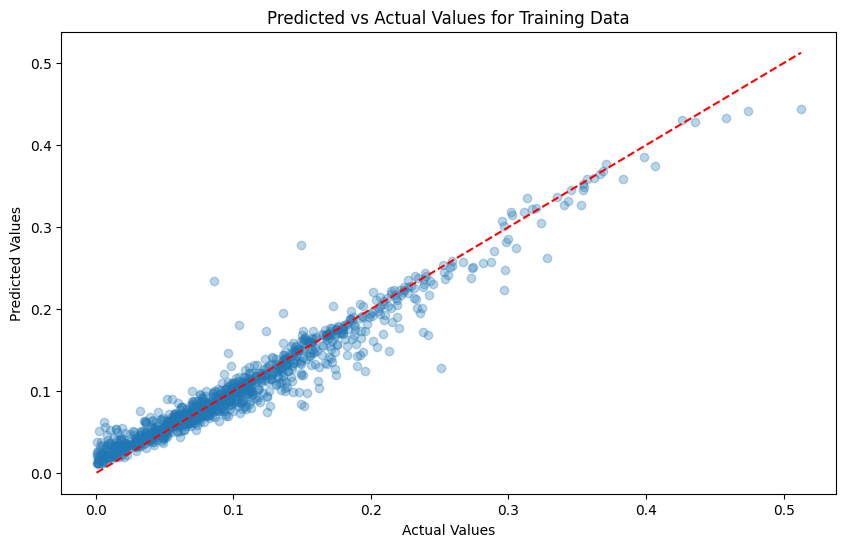

Mean Squared Error (MSE): 0.0014191339270333654
R^2 Score: 0.7949648337895276


In [39]:
# Print the best parameters found by GridSearchCV
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

rf_model = RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=190, random_state=42, max_depth=30)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = rf_model.predict(X_train)

# Plot predicted vs actual values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for Training Data')
plt.show()

# Predict on the testing data
y_test_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R^2 score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")